**1 - Carga de datos y entorno**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.listdir('/content/drive/MyDrive/datasets')

['ventas.csv',
 'clientes.csv',
 'marketing.csv',
 'sales_clean.csv',
 'clients_clean.csv',
 'marketing_clean.csv']

In [1]:
sales_path = '/content/drive/MyDrive/datasets/ventas.csv'
clients_path = '/content/drive/MyDrive/datasets/clientes.csv'
marketing_path = '/content/drive/MyDrive/datasets/marketing.csv'

sales = pd.read_csv(sales_path)
clients = pd.read_csv(clients_path)
marketing = pd.read_csv(marketing_path)

print('ventas.shape ~~>', sales.shape)
print('clientes.shape ~~>', clients.shape)
print('marketing.shape ~~>', marketing.shape)

display(sales.head(3))
display(clients.head(3))
display(marketing.head(3))

NameError: name 'pd' is not defined

4 - EDA

In [ ]:
def eda(df, name):
    print(f"=== {name} ===")
    print("shape:", df.shape)
    print("columnas:", list(df.columns))
    print("dtypes:")
    print(df.dtypes)
    print("\nNulos por columna:")
    print(df.isna().sum())
    print("\nPrimeras filas:")
    display(df.head(5))
    print("\nDescribe (numérico):")
    display(df.describe(include='number'))
    print("-"*100)

In [ ]:
eda(sales, "VENTAS (inicial)")

=== VENTAS (inicial) ===
shape: (3035, 6)
columnas: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
dtypes:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object

Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Primeras filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos



Describe (numérico):


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


----------------------------------------------------------------------------------------------------


In [ ]:
eda(clients, "CLIENTES (inicial)")

=== CLIENTES (inicial) ===
shape: (567, 5)
columnas: ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']
dtypes:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Primeras filas:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65



Describe (numérico):


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


----------------------------------------------------------------------------------------------------


In [ ]:
eda(marketing, "MARKETING (inicial)")

=== MARKETING (inicial) ===
shape: (90, 6)
columnas: ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
dtypes:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Primeras filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024



Describe (numérico):


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


----------------------------------------------------------------------------------------------------


5 - Nulos y duplicados

In [ ]:
def quality(df, name, key=None):
  print(f"### {name}")

  display(df.isna().sum().to_frame("nulos"))

  dup_rows = df.duplicated(keep=False).sum()
  print("Filas exactas duplicadas:", dup_rows)

  if key and key in df.columns:
      dup_key = df[key].duplicated(keep=False).sum()
      print(f"Duplicados por clave '{key}':", dup_key)
      if dup_key > 0:
          duplicados_ordenados = (
              df[df[key].duplicated(keep=False)][key]
              .value_counts()
              .sort_values(ascending=False)
          )

          print("\n🔁 Top valores duplicados más frecuentes:")
          display(duplicados_ordenados.head(10))
      else:
          print(f"No se encontraron duplicados en la clave '{key}'.")
  else:
      if key:
          print(f"La clave '{key}' no existe en el DataFrame.")
      else:
          print("No se indicó una clave para analizar duplicados por columna.")

In [ ]:
quality(sales, "VENTAS", key="id_venta")

### VENTAS


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Filas exactas duplicadas: 70
Duplicados por clave 'id_venta': 70

🔁 Top valores duplicados más frecuentes:


,count
id_venta,
56,2
421,2
424,2
1868,2
2545,2
2778,2
145,2
300,2
439,2


In [ ]:
quality(clients, "CLIENTES", key="id_cliente")

### CLIENTES


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


Filas exactas duplicadas: 0
Duplicados por clave 'id_cliente': 0
No se encontraron duplicados en la clave 'id_cliente'.


In [ ]:
quality(marketing, "MARKETING", key="id_campanha")

### MARKETING


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


Filas exactas duplicadas: 0
Duplicados por clave 'id_campanha': 0
No se encontraron duplicados en la clave 'id_campanha'.


1.6- Limpieza DataSet

In [ ]:
sales_clean = sales.copy()
clients_clean = clients.copy()
marketing_clean = marketing.copy()
#-------------
sales_clean = sales_clean.drop_duplicates()
clients_clean = clients_clean.drop_duplicates()
marketing_clean = marketing_clean.drop_duplicates()

In [ ]:
quality(sales_clean, "VENTAS CLEAN", key="id_venta")

### VENTAS CLEAN


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Filas exactas duplicadas: 0
Duplicados por clave 'id_venta': 0
No se encontraron duplicados en la clave 'id_venta'.


In [ ]:
def normalize_text(df):
    for col in df.select_dtypes(include="object").columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.strip()
            .str.replace(r"[\u200b\t\r\n]", "", regex=True)
            .str.replace(" +", " ", regex=True)
            .str.title()
        )
    return df

In [ ]:
for df in [sales_clean, clients_clean, marketing_clean]:
    for col in df.columns:
        if "fecha" in col.lower():
            df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)

In [ ]:
marketing_clean["fecha_inicio"] = pd.to_datetime(marketing_clean["fecha_inicio"], errors="coerce", dayfirst=True)
marketing_clean["fecha_fin"] = pd.to_datetime(marketing_clean["fecha_fin"], errors="coerce", dayfirst=True)

In [ ]:
print(sales_clean.dtypes)
print(clients_clean.dtypes)
print(marketing_clean.dtypes)

id_venta                int64
producto               object
precio                 object
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object


In [ ]:
sales_clean = normalize_text(sales_clean)
clients_clean = normalize_text(clients_clean)
marketing_clean = normalize_text(marketing_clean)

In [ ]:
print(sales_clean.head(12))
print(clients_clean.head(12))
print(marketing_clean.head(12))

    id_venta            producto   precio  cantidad fecha_venta  \
0        792   Cuadro Decorativo   $69.94       5.0  2024-01-02   
1        811     Lámpara De Mesa  $105.10       5.0  2024-01-02   
2       1156            Secadora   $97.96       3.0  2024-01-02   
3       1372            Heladera  $114.35       8.0  2024-01-02   
4       1546            Secadora  $106.21       4.0  2024-01-02   
5       1697     Horno Eléctrico   $35.35       9.0  2024-01-02   
6       1710    Plancha De Vapor   $65.43       2.0  2024-01-02   
7       2959           Proyector   $88.17       9.0  2024-01-02   
8        318   Rincón De Plantas   $79.86      11.0  2024-01-03   
9        419          Candelabro   $66.11       8.0  2024-01-03   
10      1374          Aspiradora   $95.90       5.0  2024-01-03   
11      1571  Freidora Eléctrica  $111.18       1.0  2024-01-03   

            categoria  
0          Decoración  
1          Decoración  
2   Electrodomésticos  
3   Electrodomésticos  
4   Elec

In [ ]:
if "precio" in sales_clean.columns:
    sales_clean["precio"] = (
        sales_clean["precio"]
        .astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .str.strip()
    )
    sales_clean["precio"] = pd.to_numeric(sales_clean["precio"], errors="coerce")

In [ ]:
print(sales_clean.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [ ]:
print(sales_clean.columns)

Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta',
       'categoria'],
      dtype='object')


In [ ]:
if "cantidad" in sales_clean.columns:
    sales_clean["cantidad"] = pd.to_numeric(
        sales_clean["cantidad"], errors="coerce"
    ).astype("Int64")

In [ ]:
print(sales_clean.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [ ]:
sales_clean.info()
sales_clean.to_csv("/content/drive/MyDrive/datasets/sales_clean.csv", index=False)
clients_clean.to_csv("/content/drive/MyDrive/datasets/clients_clean.csv", index=False)
marketing_clean.to_csv("/content/drive/MyDrive/datasets/marketing_clean.csv", index=False)

print("✅ Archivos guardados: sales_clean.csv, clients_clean.csv, marketing_clean.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     3000 non-null   int64         
 1   producto     3000 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   Int64         
 4   fecha_venta  3000 non-null   datetime64[ns]
 5   categoria    3000 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 167.0+ KB
✅ Archivos guardados: sales_clean.csv, clients_clean.csv, marketing_clean.csv


In [ ]:
print(sales_clean.select_dtypes(include="object").columns)

Index(['producto', 'categoria'], dtype='object')


Reporte Global luego de limpieza

In [ ]:
def global_quality_report(dfs, names):
  summary = []
  for df, name in zip(dfs, names):
      nuls = df.isna().sum().sum()
      duplicates = df.duplicated(keep=False).sum()
      columns = len(df.columns)
      rows = len(df)

      summary.append({
          "Dataset": name,
          "Filas": rows,
          "Columnas": columns,
          "Nulos totales": nuls,
          "Duplicados": duplicates,
      })

  report = pd.DataFrame(summary)
  return report

In [ ]:
print(global_quality_report([sales, clients, marketing], ["VENTAS Original", "CLIENTES Original", "MARKETING Original"]))
print(global_quality_report([sales_clean, clients_clean, marketing_clean],["VENTAS Copia   ", "CLIENTES Copia   ", "MARKETING Copia   "]))

              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Original   3035         6              4          70
1   CLIENTES Original    567         5              0           0
2  MARKETING Original     90         6              0           0
              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Copia      3000         6              4           0
1   CLIENTES Copia       567         5              0           0
2  MARKETING Copia        90         6              0           0


**Etapa 2 - Transformación de datos para mostrar solo los productos con alto rendimiento.**

In [ ]:
sales_perf = (
    sales_clean
    .assign(
        income = sales_clean["precio"] * sales_clean["cantidad"]
    )
)

In [ ]:
summary_prod = (
    sales_perf
    .groupby(
        by="producto",
        dropna=False,
        as_index=False,
        observed=False
    )
    .agg(
        ingreso_total=('income', 'sum'),
        unidades=('cantidad', 'sum'),
        precio_promedio=('precio', 'mean'),
        registros=('income', 'size')
    )
)

In [ ]:
print(summary_prod.head(60))

                  producto  ingreso_total  unidades  precio_promedio  \
0          Adorno De Pared       48093.49       633        76.097800   
1                 Alfombra       44773.06       615        74.098300   
2               Aspiradora       50085.86       651        77.447400   
3              Auriculares       74175.58       958        76.302727   
4                 Batidora        50979.2       672        77.537200   
5                 Cafetera       59607.31       765        79.046581   
6               Candelabro        11128.8       160        74.595417   
7   Consola De Videojuegos       46174.41       623        76.346869   
8                 Cortinas       44865.03       610        73.649900   
9        Cuadro Decorativo        54297.6       726        74.578000   
10          Cámara Digital       45217.96       638        72.010700   
11   Elementos De Cerámica       45411.09       636        71.611515   
12       Espejo Decorativo       46783.31       635        75.66

In [ ]:
p80_income = summary_prod["ingreso_total"].quantile(
    q=0.80,
    interpolation="linear"
)
top_sales = (
    summary_prod
    .query(
        "ingreso_total >= @p80_ingreso",
        engine="python"
    )
    .sort_values(
        by=["ingreso_total", "unidades"],
        ascending=[False, False],
        na_position="last",
        ignore_index=False
    )
)

print(f"Umbral (percentil 80) de ingreso_total: {float(p80_income):,.2f}")
print("✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):")
display(top_sales.head(60))

Umbral (percentil 80) de ingreso_total: 52,518.85
✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):


,producto,ingreso_total,unidades,precio_promedio,registros
19,Lámpara De Mesa,82276.38,1112,72.720625,176
3,Auriculares,74175.58,958,76.302727,143
20,Microondas,72562.89,912,79.176000,135
5,Cafetera,59607.31,765,79.046581,117
9,Cuadro Decorativo,54297.6,726,74.578000,100
26,Smartphone,54132.44,665,81.398416,101


In [ ]:
sales_cat = sales_perf.copy()

summary_cat = (
    sales_cat
    .groupby(
        by="categoria",
        dropna=False,
        as_index=False
    )
    .agg(
        ingreso_total=('income', 'sum'),
        unidades=('cantidad', 'sum'),
        ventas=('income', 'size'),
        precio_promedio=('precio', 'mean')
    )
    .sort_values(
        by='ingreso_total',
        ascending=False,
        na_position='last',
        ignore_index=True
    )
)
summary_cat = summary_cat.assign(
    ticket_promedio_por_venta = summary_cat['ingreso_total'] / summary_cat['ventas']
)
print("Resumen por categoría (ordenado por ingreso_total):")
display(summary_cat.head(5))

Resumen por categoría (ordenado por ingreso_total):


,categoria,ingreso_total,unidades,ventas,precio_promedio,ticket_promedio_por_venta
0,Electrodomésticos,505299.63,6592,1000,76.52096,505.29963
1,Electrónica,482577.8,6413,999,75.25492,483.060861
2,Decoración,479216.09,6490,1001,74.09800,478.737353


2 - 4. Integración de datos

In [ ]:
df_sales_x_product = sales_clean.groupby('producto').agg(
    precio_por_cantidad=('precio', lambda x: (x * sales_clean.loc[x.index, 'cantidad']).sum())
)
df_sales_x_product = df_sales_x_product.sort_values(by='producto', ascending=True)
display(df_sales_x_product)

,precio_por_cantidad
producto,
Adorno De Pared,48093.49
Alfombra,44773.06
Aspiradora,50085.86
Auriculares,74175.58
Batidora,50979.20
Cafetera,59607.31
Candelabro,11128.80
Consola De Videojuegos,46174.41
Cortinas,44865.03


In [ ]:
df_marketing_x_product = marketing_clean.groupby('producto')['costo'].sum().reset_index()
df_marketing_x_product = df_marketing_x_product[['producto', 'costo']]
df_marketing_x_product = df_marketing_x_product.sort_values(by='producto', ascending=True)
display(df_marketing_x_product)

,producto,costo
0,Adorno De Pared,14.05
1,Alfombra,17.46
2,Aspiradora,16.46
3,Auriculares,15.24
4,Batidora,15.28
5,Cafetera,18.16
6,Candelabro,14.65
7,Consola De Videojuegos,12.77
8,Cortinas,17.36
9,Cuadro Decorativo,15.85


In [ ]:
merged_df = pd.merge(df_sales_x_product, df_marketing_x_product, on='producto')
display(merged_df)

,producto,precio_por_cantidad,costo
0,Adorno De Pared,48093.49,14.05
1,Alfombra,44773.06,17.46
2,Aspiradora,50085.86,16.46
3,Auriculares,74175.58,15.24
4,Batidora,50979.20,15.28
5,Cafetera,59607.31,18.16
6,Candelabro,11128.80,14.65
7,Consola De Videojuegos,46174.41,12.77
8,Cortinas,44865.03,17.36
9,Cuadro Decorativo,54297.60,15.85


In [ ]:
merged_df['porcentaje_costo_sobre_ingreso'] = (merged_df['costo'] / merged_df['precio_por_cantidad']) * 100
display(merged_df)

,producto,precio_por_cantidad,costo,porcentaje_costo_sobre_ingreso
0,Adorno De Pared,48093.49,14.05,0.029214
1,Alfombra,44773.06,17.46,0.038997
2,Aspiradora,50085.86,16.46,0.032864
3,Auriculares,74175.58,15.24,0.020546
4,Batidora,50979.20,15.28,0.029973
5,Cafetera,59607.31,18.16,0.030466
6,Candelabro,11128.80,14.65,0.131640
7,Consola De Videojuegos,46174.41,12.77,0.027656
8,Cortinas,44865.03,17.36,0.038694
9,Cuadro Decorativo,54297.60,15.85,0.029191


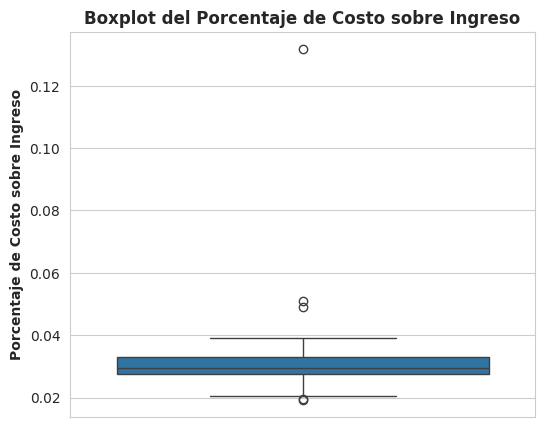

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.boxplot(y=merged_df['porcentaje_costo_sobre_ingreso'])
plt.title('Boxplot del Porcentaje de Costo sobre Ingreso', weight='bold')
plt.ylabel('Porcentaje de Costo sobre Ingreso', weight='bold')
plt.show()

In [ ]:
display(merged_df.head())

,producto,precio_por_cantidad,costo,porcentaje_costo_sobre_ingreso
0,Adorno De Pared,48093.49,14.05,0.029214
1,Alfombra,44773.06,17.46,0.038997
2,Aspiradora,50085.86,16.46,0.032864
3,Auriculares,74175.58,15.24,0.020546
4,Batidora,50979.20,15.28,0.029973


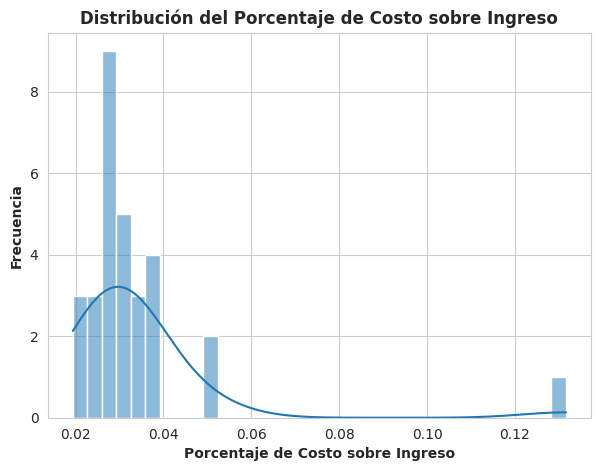

In [ ]:
plt.figure(figsize=(7, 5))
sns.histplot(merged_df['porcentaje_costo_sobre_ingreso'], kde=True)
plt.title('Distribución del Porcentaje de Costo sobre Ingreso', weight='bold')
plt.xlabel('Porcentaje de Costo sobre Ingreso', weight='bold')
plt.ylabel('Frecuencia', weight='bold')
plt.show()

**ETAPA 3 - 1. Estadística descriptiva**

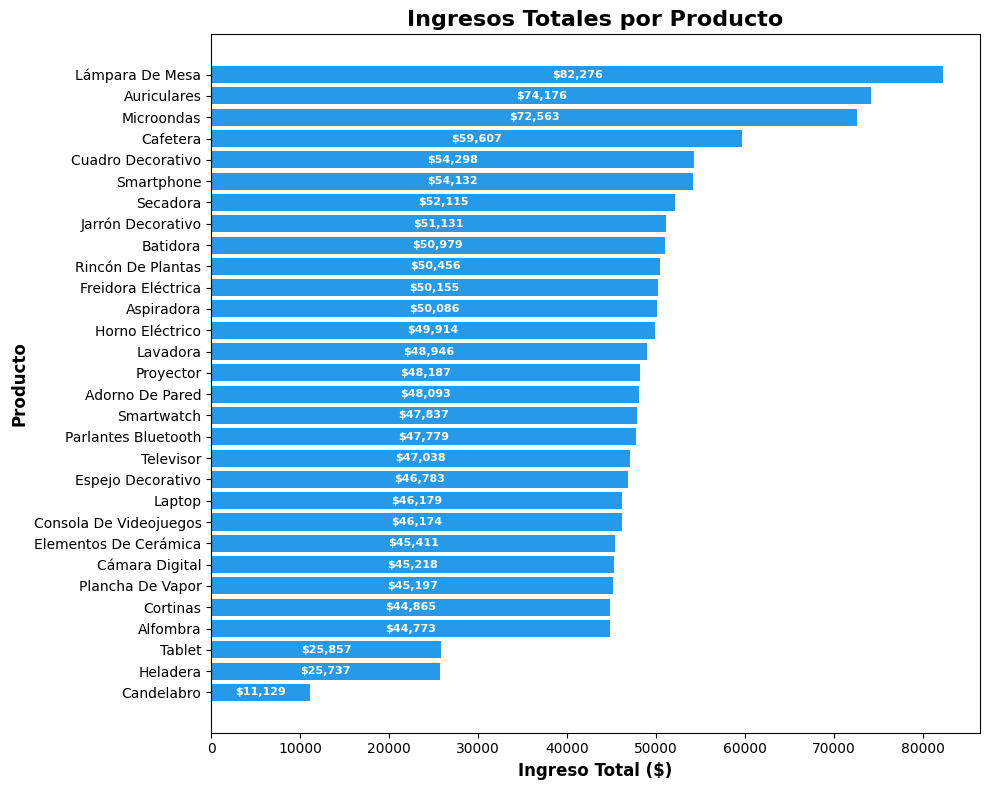

In [ ]:
import matplotlib.pyplot as plt

df = summary_prod.copy()
df_tidy = df.sort_values("ingreso_total", ascending=True)

plt.figure(figsize=(10, 8))
blue_color = "#2699E9"
bars = plt.barh(df_tidy["producto"], df_tidy["ingreso_total"], color=blue_color)
plt.title("Ingresos Totales por Producto", fontsize=16, weight="bold")
plt.xlabel("Ingreso Total ($)", fontsize=12, weight="bold")
plt.ylabel("Producto", fontsize=12, weight="bold")
for bar in bars:
    width = bar.get_width()
    plt.text(
        width / 2,
        bar.get_y() + bar.get_height() / 2,
        f"${width:,.0f}",
        ha='center',
        va='center',
        fontsize=8,
        color="white",
        weight="bold"
    )

plt.tight_layout()
plt.show()

In [ ]:
average = df['ingreso_total'].mean()
median = df['ingreso_total'].median()
mode = df['ingreso_total'].mode()

print("Media:", average)
print("Mediana:", median)
print("Moda:\n", mode)

Media: 48903.117333333335
Mediana: 48140.244999999995
Moda:
 0      11128.8
1      25736.8
2     25856.57
3     44773.06
4     44865.03
5     45196.63
6     45217.96
7     45411.09
8     46174.41
9     46179.48
10    46783.31
11    47038.04
12    47779.46
13    47836.86
14    48093.49
15     48187.0
16    48946.44
17     49913.9
18    50085.86
19    50155.15
20    50456.45
21     50979.2
22    51130.88
23    52115.45
24    54132.44
25     54297.6
26    59607.31
27    72562.89
28    74175.58
29    82276.38
Name: ingreso_total, dtype: Float64
